In [238]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy


Data = pd.read_csv("reddit_train.csv",sep=",",usecols=[1,2])
Data = Data.sample(frac=1).reset_index(drop=True)

Test = pd.read_csv("reddit_test.csv",sep=",")
Test = Test.sample(frac=1).reset_index(drop=True)





Data.head(5)

,comments,subreddits
0,&gt; Money is money. Eventually you run out of...,conspiracy
1,"IMT got trashed by P1 pre-rift rivals, no way ...",leagueoflegends
2,You mean a car he bought from police auction t...,nfl
3,1. I really recommend that you either watch a ...,gameofthrones
4,Some science fiction is really good at closing...,funny


In [203]:
Data.shape

(70000, 2)

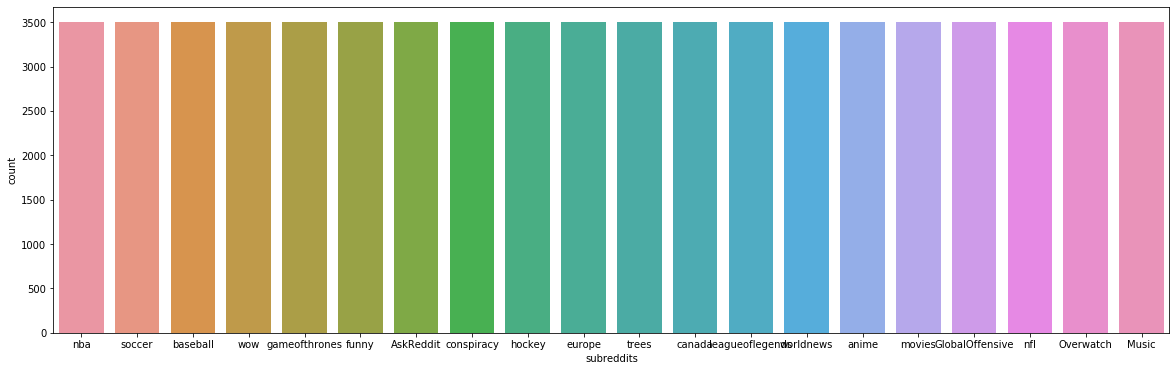

In [204]:
dims = (20, 6)
fig= plt.subplots(figsize=dims)
sb.countplot(x= 'subreddits' ,data=Data)

In [218]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stopWords.add('URL')
stopWords.add('AT_USER')
print(stopWords)

{'isn', 'hasn', "don't", 'which', 'through', "aren't", 'himself', 'until', 'its', 'will', 'then', 'other', 'mightn', 'am', 'so', 'haven', 'how', "shouldn't", "needn't", 'themselves', "haven't", 'and', 'myself', "you'll", 'only', 'own', 'nor', 'i', 'll', 'if', "won't", 'd', 'URL', 'who', 'against', 'were', 're', 've', 'under', 'off', 'our', 'with', "you'd", 'what', 'few', 'couldn', 'AT_USER', 'further', 'is', 'their', 'we', 'do', 'yours', "isn't", 'does', 'herself', 'why', 'for', 'both', 'wouldn', "didn't", 'are', "should've", 'y', 'because', "hasn't", 'not', 'shouldn', 'being', 'he', 'very', 'doing', 'an', 'o', 'needn', 'was', 'you', 'just', 'whom', 'about', 'again', 'ma', 'same', "you've", 'don', 'of', 'be', 'itself', 'hadn', 'any', 'or', 'from', 'ain', 'once', 'her', "that'll", 'yourself', 'a', 'it', "weren't", "mustn't", 'his', 'after', 'yourselves', 'before', 'these', "shan't", 'those', 'but', 'theirs', 'this', 'while', 'most', 'me', "it's", 'him', 'have', 'ours', "she's", "mightn'

In [240]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

enc.fit(["nba","hockey","leagueoflegends","soccer","funny","movies","anime","Overwatch","trees","GlobalOffensive","nfl","AskReddit",
         "gameofthrones","conspiracy","worldnews","Music","wow","europe","canada","baseball"])



Data['comments']=Data['comments'].replace(to_replace=r'((www\.[^\s]+)|(https?://[^\s]+))', value='URL', regex=True)
Data['comments']=Data['comments'].replace(to_replace=r'@[^\s]+', value='AT_USER', regex=True)
Data['comments'].apply(word_tokenize)


X_train= Data['comments']
y_train= enc.transform(Data['subreddits'])
X_test= Test['comments']





In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words=stopWords, ngram_range=(1, 3))
 

Xtrain=vec.fit_transform(X_train)
Xtest= vec.transform(X_test)

In [243]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
XtrainSVD=svd.fit_transform(Xtrain)
XtestSVD=svd.transform(Xtest)